# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'.

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I.
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II.
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III.
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'.

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [ ]:
N = 10
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
Var_col = cols[N % 7]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# df = pd.read_csv('datasets/teen_phone_addiction_dataset.csv')

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/7S/OIIAI/teen_phone_addiction_dataset.csv'
df = pd.read_csv(file_path)

target_column = Var_col
data = df[target_column].dropna()

Mounted at /content/drive


# 1) Stats and graphs

DATA STATS:
Mean: 1.01
Variance: 0.24
Mode: 1.00
Median: 1.00
Quantiles 0.25, 0.5, 0.75: [0.7 1.  1.4]
Kurtosis: -0.35
Skewness: 0.10
IQR: 0.70


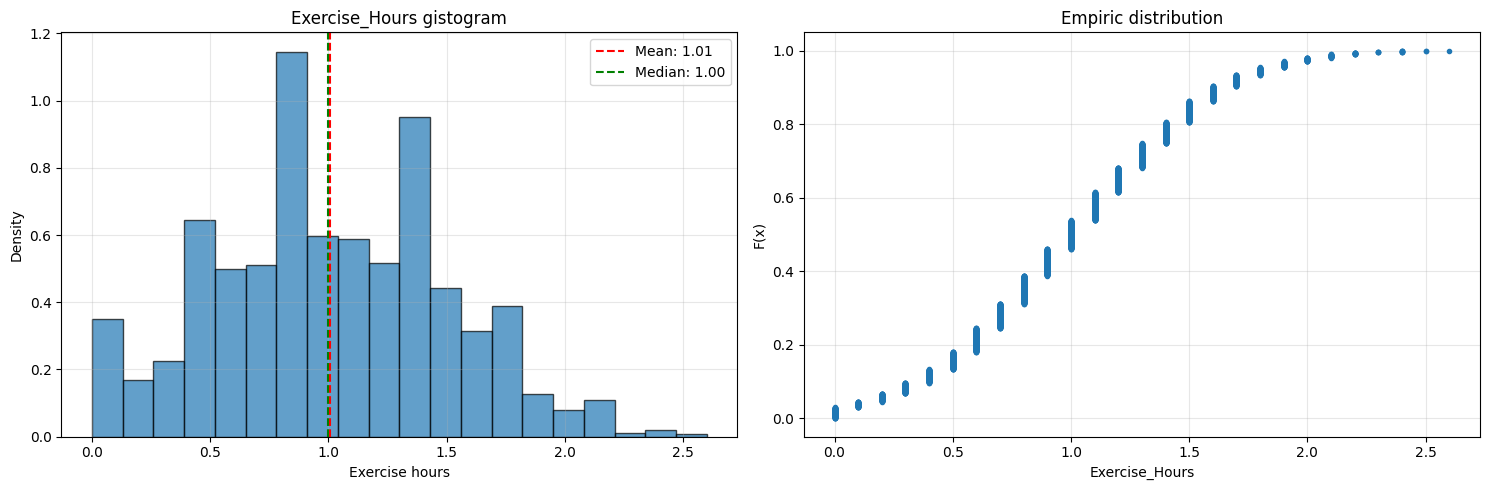

In [ ]:
# 1. Stats
mean_val = data.mean()
variance_val = data.var()
mode_val = data.mode().iloc[0]
median_val = data.median()
quantiles = data.quantile([0.25, 0.5, 0.75])
kurtosis_val = data.kurtosis()
skewness_val = data.skew()
iqr = quantiles[0.75] - quantiles[0.25]

print("DATA STATS:")
print(f"Mean: {mean_val:.2f}")
print(f"Variance: {variance_val:.2f}")
print(f"Mode: {mode_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Quantiles 0.25, 0.5, 0.75: {quantiles.values}")
print(f"Kurtosis: {kurtosis_val:.2f}")
print(f"Skewness: {skewness_val:.2f}")
print(f"IQR: {iqr:.2f}")

# 2. Graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gistogram
ax1.hist(data, bins=20, alpha=0.7, edgecolor='black', density=True)
ax1.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
ax1.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
ax1.set_title('Exercise_Hours gistogram')
ax1.set_xlabel('Exercise hours')
ax1.set_ylabel('Density')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Empiric distribution
sorted_data = np.sort(data)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax2.plot(sorted_data, y, marker='.', linestyle='none')
ax2.set_title('Empiric distribution')
ax2.set_xlabel('Exercise_Hours')
ax2.set_ylabel('F(x)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2) Normal distribution checkup

Xi-2 test: stat = 200.807, p-value = 0.000
Skewness test: p-value = 0.028
Curtosis test: p-value = 0.000


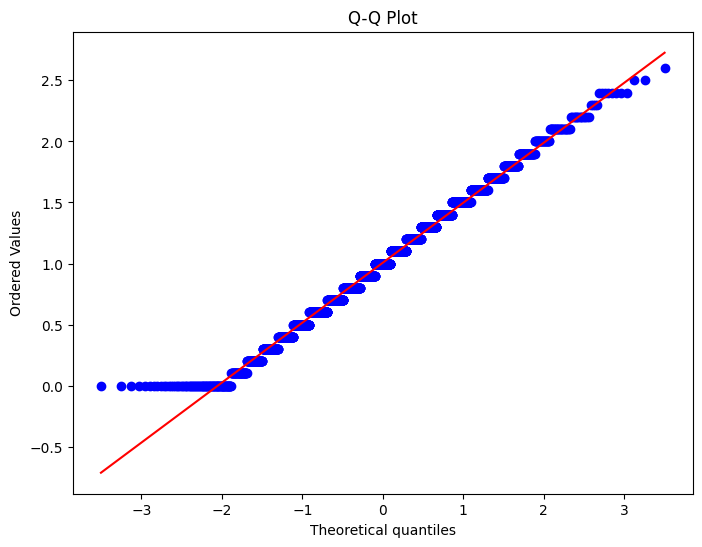


Normality by Xi-2: No
Normality by skewness and kurtosis: No


In [ ]:
# 1. Xi-2 criterion
def chi_square_normality_test(data, alpha=0.05):
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)

    #
    k = max(3, int(1 + 3.322 * np.log10(n)))  #
    hist, bin_edges = np.histogram(data, bins=k, density=False)


    expected_freq = []
    for i in range(len(bin_edges)-1):
        prob = (stats.norm.cdf(bin_edges[i+1], mean, std) -
                stats.norm.cdf(bin_edges[i], mean, std))
        expected_freq.append(prob * n)


    observed = []
    expected = []
    for i in range(len(expected_freq)):
        if expected_freq[i] >= 5:
            observed.append(hist[i])
            expected.append(expected_freq[i])

    if len(observed) < 3:
        return None, None, False

    # Stat
    observed = np.array(observed)
    expected = np.array(expected)
    chi2_stat = np.sum((observed - expected)**2 / expected)
    df = len(observed) - 3
    p_value = 1 - stats.chi2.cdf(chi2_stat, df) if df > 0 else 1.0

    return chi2_stat, p_value, p_value > alpha

chi2_stat, p_value, is_normal_chi2 = chi_square_normality_test(data)
if chi2_stat is not None:
    print(f"Xi-2 test: stat = {chi2_stat:.3f}, p-value = {p_value:.3f}")
else:
    print("[ERR] Xi-2 test: not enough data")
    is_normal_chi2 = False

# 2. Skewness, kurtosis
def skewness_kurtosis_test(data, alpha=0.05):
    n = len(data)
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)


    se_skew = np.sqrt(6 * n * (n - 1) / ((n - 2) * (n + 1) * (n + 3)))
    se_kurt = np.sqrt(24 * n * (n - 1)**2 / ((n - 3) * (n - 2) * (n + 3) * (n + 5)))

    z_skew = skewness / se_skew
    z_kurt = kurtosis / se_kurt

    p_skew = 2 * (1 - stats.norm.cdf(abs(z_skew)))
    p_kurt = 2 * (1 - stats.norm.cdf(abs(z_kurt)))

    return (p_skew > alpha) and (p_kurt > alpha), p_skew, p_kurt

is_normal_skew_kurt, p_skew, p_kurt = skewness_kurtosis_test(data)
print(f"Skewness test: p-value = {p_skew:.3f}")
print(f"Curtosis test: p-value = {p_kurt:.3f}")

# 3. Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

print(f"\nNormality by Xi-2: {'Yes' if is_normal_chi2 else 'No'}")
print(f"Normality by skewness and kurtosis: {'Yes' if is_normal_skew_kurt else 'No'}")

# 3) Data to normal distribution

Transforms compare:
Original: асимметрия = 0.098, эксцесс = -0.350
Anomalies cleaned: асимметрия = 0.079, эксцесс = -0.395
Log transform: асимметрия = -0.533, эксцесс = -0.038
Standartization: асимметрия = 0.098, эксцесс = -0.350

Best transform: Anomalies cleaned

TRANSFORMED DATA TEST(Anomalies cleaned):
Mean: 1.01
Skewness: 0.08
Kurtosis: -0.39


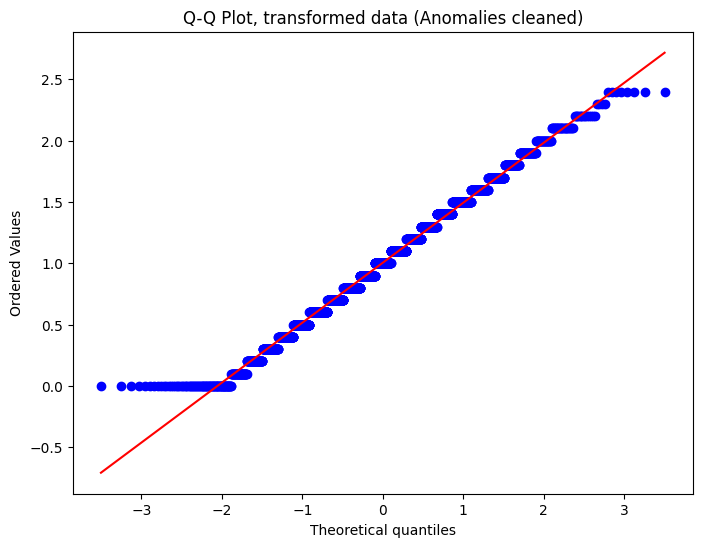

In [ ]:
# 1. Delete anomalies via IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned = data[(data >= lower_bound) & (data <= upper_bound)]

# 2. Log transform
data_log = np.log1p(data)

# 3. Standartization
data_standardized = (data - data.mean()) / data.std()

# Compare transforms
transformations = {
    'Original': data,
    'Anomalies cleaned': data_cleaned,
    'Log transform': data_log,
    'Standartization': data_standardized
}

print("Transforms compare:")
for name, transformed_data in transformations.items():
    skew = stats.skew(transformed_data)
    kurt = stats.kurtosis(transformed_data)
    print(f"{name}: асимметрия = {skew:.3f}, эксцесс = {kurt:.3f}")

best_transform_name = min(transformations.keys(),
                         key=lambda x: abs(stats.skew(transformations[x])))
best_transform_data = transformations[best_transform_name]

print(f"\nBest transform: {best_transform_name}")


print(f"\nTRANSFORMED DATA TEST({best_transform_name}):")

mean_processed = best_transform_data.mean()
skew_processed = stats.skew(best_transform_data)
kurt_processed = stats.kurtosis(best_transform_data)

print(f"Mean: {mean_processed:.2f}")
print(f"Skewness: {skew_processed:.2f}")
print(f"Kurtosis: {kurt_processed:.2f}")

# Q-Q plot, transformed data
plt.figure(figsize=(8, 6))
stats.probplot(best_transform_data, dist="norm", plot=plt)
plt.title(f'Q-Q Plot, transformed data ({best_transform_name})')
plt.show()

# 4) Group by <code>school_grade</code>

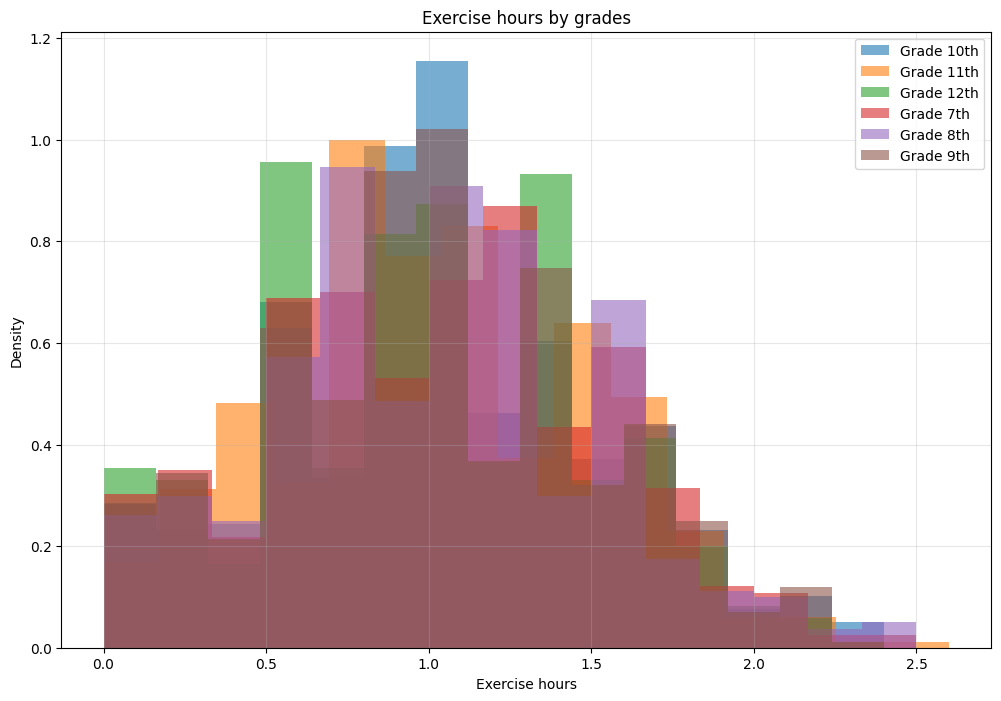

STATS BY GROUPS:
              mean   var  count   std
School_Grade                         
10th          1.02  0.24    487  0.49
11th          1.02  0.23    479  0.48
12th          0.98  0.24    529  0.49
7th           1.01  0.25    497  0.50
8th           1.01  0.24    482  0.49
9th           1.01  0.24    526  0.49


In [ ]:
if 'School_Grade' in df.columns:
    grouped_data = df.groupby('School_Grade')[target_column]

    # Histograms
    plt.figure(figsize=(12, 8))
    grades = []
    for grade, group_data in grouped_data:
        grades.append(grade)
        plt.hist(group_data.dropna(), alpha=0.6, label=f'Grade {grade}',
                 bins=15, density=True)

    plt.title('Exercise hours by grades')
    plt.xlabel('Exercise hours')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    group_stats = grouped_data.agg(['mean', 'var', 'count', 'std']).round(2)
    print("STATS BY GROUPS:")
    print(group_stats)

else:
    print("[ERR] No such col in dataset")
    print("Cols available:", df.columns.tolist())

# 5) Conclusion

In [ ]:
print("\n" + "="*50)
print("CONCLUSION:")
print("="*50)

print("\n1. STATS AND PLOTS:")
print(f"   - Skewness {skewness_val:.2f} (moved right)")
print(f"   - Kurtosis {kurtosis_val:.2f} : peak sharpness")
print("   - Histogram moved right")
print("   - Function growth looks line smth non-discrete")

print("\n2. NORMALITY:")
print(f"   - Xi-2 criterion: {'normal' if is_normal_chi2 else 'not normal'}")
print(f"   - Skewness and kurtosis: {'normal' if is_normal_skew_kurt else 'not normal'}")
print("   - Q-Q plot: deviations at the beginning and at the end")

print(f"\n3. PROCESSED DATA NORMALITY:")
print(f"   - Best transform applied: {best_transform_name}")
print(f"   - Skewness change: from {skewness_val:.2f} to {stats.skew(best_transform_data):.2f}")
print("   - Result is closer to normal distribution than raw data")

if 'School_Grade' in df.columns:
    print("\n4. GRADES DIFF:")
    print("   - Difference between grades observed")
    print("   - Higher grades tend to have more exercise hours")
    print("   - Variance between groups is different")
else:
    print("\n4. [ERR] No required col was found in dataset")

print("\n5. TO SUM UP:")
print("   - Data are not normally distributed")
print("   - Transforms tend to make dataset more <<Normally-distributed>>, but not too much")
print("   - Further analysis required")


CONCLUSION:

1. STATS AND PLOTS:
   - Skewness 0.10 (moved right)
   - Kurtosis -0.35 : peak sharpness
   - Histogram moved right
   - Function growth looks line smth non-discrete

2. NORMALITY:
   - Xi-2 criterion: not normal
   - Skewness and kurtosis: not normal
   - Q-Q plot: deviations at the beginning and at the end

3. PROCESSED DATA NORMALITY:
   - Best transform applied: Anomalies cleaned
   - Skewness change: from 0.10 to 0.08
   - Result is closer to normal distribution than raw data

4. GRADES DIFF:
   - Difference between grades observed
   - Higher grades tend to have more exercise hours
   - Variance between groups is different

5. TO SUM UP:
   - Data are not normally distributed
   - Transforms tend to make dataset more <<Normally-distributed>>, but not too much
   - Further analysis required
